# Tips

### Introduction:

This exercise was created based on the tutorial and documentation from [Seaborn](https://stanford.edu/~mwaskom/software/seaborn/index.html)  
The dataset being used is tips from Seaborn.

### Step 1. Import the necessary libraries:

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv). 

In [50]:
url = "https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/07_Visualization/Tips/tips.csv"
pd.read_csv( url )

,Unnamed: 0,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...,...
239,239,29.03,5.92,Male,No,Sat,Dinner,3
240,240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 3. Assign it to a variable called tips

In [51]:
tips = pd.read_csv( url )

### Step 4. Delete the Unnamed 0 column

In [52]:
tips.drop('Unnamed: 0', axis=1, inplace=True)
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


### Step 5. Plot the total_bill column histogram

Text(0.5, 1.0, 'total_bill column histogram')

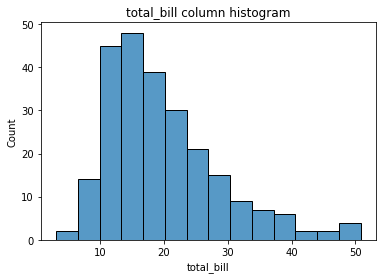

In [53]:
ax = plt.subplots( )
ax = sns.histplot(tips['total_bill'],kde = False)
ax.set_title('total_bill column histogram') 

### Step 6. Create a scatter plot presenting the relationship between total_bill and tip

Text(0.5, 1.0, 'total bill x tip')

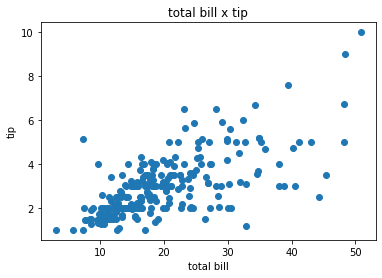

In [54]:
plt.scatter(tips.total_bill, tips.tip)

# Set the title and labels
plt.xlabel('total bill')
plt.ylabel('tip')
plt.title('total bill x tip')

### Step 7.  Create one image with the relationship of total_bill, tip and size.
#### Hint: It is just one function.

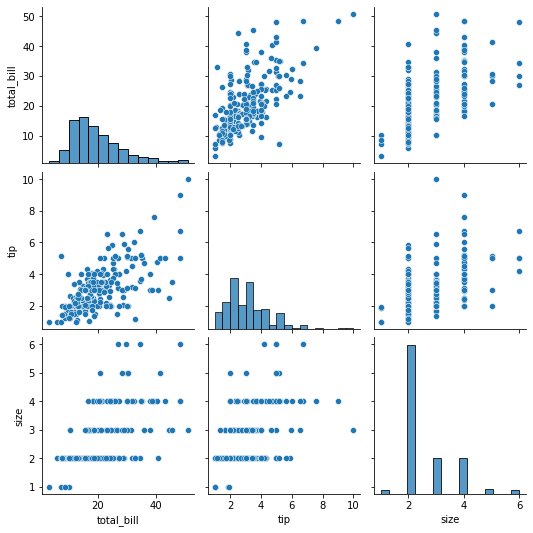

In [55]:
# 수치형 데이터간 산점도 보여줌
sns.pairplot(tips)

### Step 8. Present the relationship between days and total_bill value

Text(0.5, 1.0, 'relationship between days and total_bill value')

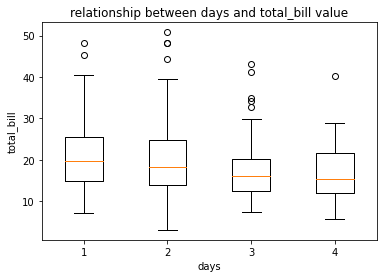

In [56]:
# 범주형 변수의 시각화 방법 - box plot
boxplot = plt.figure()
ax = boxplot.add_subplot(1,1,1)
ax.boxplot([tips[tips['day'] == 'Sun']['total_bill'],
            tips[tips['day'] == 'Sat']['total_bill'],
            tips[tips['day'] == 'Thur']['total_bill'],
            tips[tips['day'] == 'Fri']['total_bill']])
ax.set_xlabel('days')
ax.set_ylabel('total_bill')
ax.set_title('relationship between days and total_bill value')

### Step 9. Create a scatter plot with the day as the y-axis and tip as the x-axis, differ the dots by sex

Text(0, 0.5, 'Day')

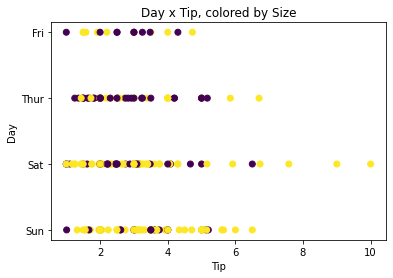

In [57]:
def recode_sex(sex):
    if sex == 'Female':
        return 0
    else:
        return 1
tips['sex_color'] = tips['sex'].apply(recode_sex)


scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(
    x=tips['tip'],
    y=tips['day'],
    c=tips['sex_color'],
    )
axes1.set_title('Day x Tip, colored by Size')
axes1.set_xlabel('Tip')
axes1.set_ylabel('Day')

### Step 10.  Create a box plot presenting the total_bill per day differetiation the time (Dinner or Lunch)

Text(0, 0.5, 'total bill')

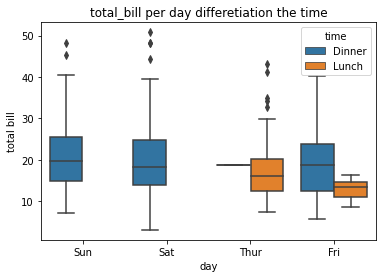

In [60]:
ax = plt.subplots()
ax = sns.boxplot(x="day", y="total_bill", hue="time", data=tips)
ax.set_title('total_bill per day differetiation the time')
ax.set_xlabel('day')
ax.set_ylabel('total bill')

### Step 11. Create two histograms of the tip value based for Dinner and Lunch. They must be side by side.

C:\Users\Jaewon\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


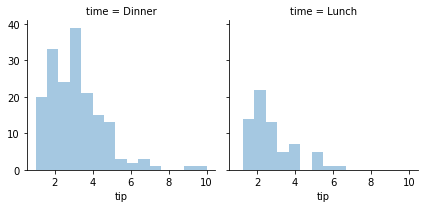

In [62]:
facet = sns.FacetGrid (tips, col='time') #데이터프레임, 그룹 구분용 column 이름 전달해 객체 생성
facet.map(sns.distplot, 'tip', kde=False) # map 메서드에 그래프 종류, x축 지정 열 전달

### Step 12. Create two scatterplots graphs, one for Male and another for Female, presenting the total_bill value and tip relationship, differing by smoker or no smoker
### They must be side by side.

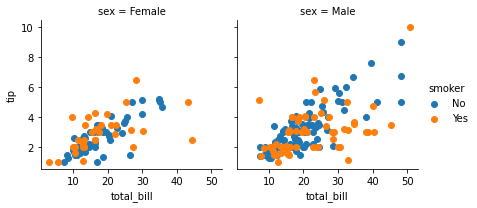

In [65]:
facet = sns.FacetGrid (tips, col='sex', hue = 'smoker') 
facet.map(plt.scatter, 'total_bill', 'tip')
facet = facet.add_legend()

### BONUS: Create your own question and answer it using a graph.

Text(0.5, 1.0, 'tip column histogram')

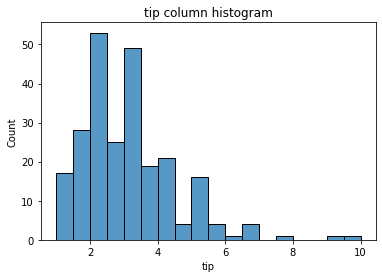

In [66]:
# Plot the tip column histogram

ax = plt.subplots( )
ax = sns.histplot(tips['tip'],kde = False)
ax.set_title('tip column histogram')